# PMYCについて

- 親変数 parent variable 他の変数に影響を与える変数
- 子変数 child variable 他の変数から影響を受ける変数

ある変数は親変数と子変数の両方になれる。
PMYCは親変数と子変数にアクセスできる。

In [7]:
import pymc as pm

lambda_ = pm.Exponential("poisson_param", 1)

data_generator = pm.Poisson("data_gnerator", lambda_)
data_plus_one = data_generator + 1

print("Children of lambda_")
print(lambda_.children)

print("Parents of data generator")
print(data_generator.parents)

print("Childern of data generator")
print(data_generator.children)


Children of lambda_
{<pymc.distributions.new_dist_class.<locals>.new_class 'data_gnerator' at 0x0000025F2DCC47B8>}
Parents of data generator
{'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_param' at 0x0000025F2DCEF358>}
Childern of data generator
{<pymc.PyMCObjects.Deterministic '(data_gnerator_add_1)' at 0x0000025F2DCEF7F0>}


全てのPYMC変数は、valueプロパティを持っている。

- stochastic変数（確率的）　親変数が分かっていても値がランダムな物。○○分布
- deterministic変数（決定的）　親関数が分かっていればその値が決まる変数。


In [8]:
print("lambda_value =", lambda_.value)
print("data_generator value = ", data_generator.value)
print("data_plus_one value = ",  data_plus_one.value)

lambda_value = 1.5436746265818748
data_generator value =  2
data_plus_one value =  3


## モデルに観測を組み込む

In [9]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
figsize(12.5, 4)

In [24]:
lambda_1 = pm.Exponential("lambda_1", 1)
lambda_2 = pm.Exponential("lambda_2", 1)
tau = pm.DiscreteUniform("tau", lower=0, upper=10)
data = np.array([10, 25, 15, 20, 35])
n_count_data = len(data)
obs = pm.Poisson("obs", lambda_, value=data, observed=True)

@pm.deterministic
def lambda_(tau=tau, lamba_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1 
    out[tau:] = lambda_2
    return out


(array([  9.46353370e-01,   8.09770144e-01,   7.10981180e-01,
          6.41754065e-01,   5.47081308e-01,   4.88706011e-01,
          4.19853097e-01,   3.73452220e-01,   3.13205920e-01,
          2.73914854e-01,   2.38365795e-01,   2.21526768e-01,
          1.81487301e-01,   1.64648273e-01,   1.42944637e-01,
          1.16750594e-01,   1.09640782e-01,   9.54211583e-02,
          8.86855471e-02,   8.41951397e-02,   6.28657043e-02,
          5.50074913e-02,   4.37814726e-02,   4.07878677e-02,
          3.36780559e-02,   3.06844509e-02,   2.61940435e-02,
          2.58198428e-02,   2.39488397e-02,   2.43230404e-02,
          1.87100310e-02,   1.38454230e-02,   1.90842317e-02,
          1.57164261e-02,   1.01034168e-02,   9.35501552e-03,
          8.98081490e-03,   8.60661428e-03,   5.98720993e-03,
          5.61300931e-03,   4.11620683e-03,   3.36780559e-03,
          2.61940435e-03,   4.11620683e-03,   2.24520373e-03,
          2.61940435e-03,   2.24520373e-03,   7.48401242e-04,
        

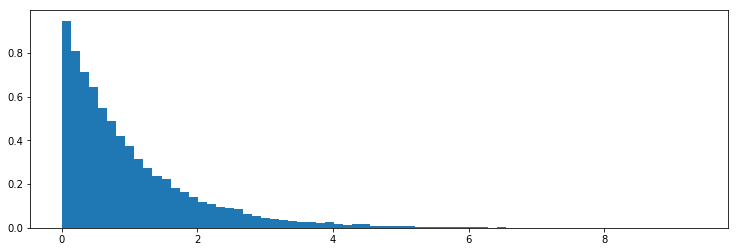

In [25]:
samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")

stochastic変数を固定値にしてモデルに組み込む

In [26]:
model = pm.Model([obs, lambda_, lambda_1, lambda_2,tau])

## 同じ物語、異なる結末


(0, 80)

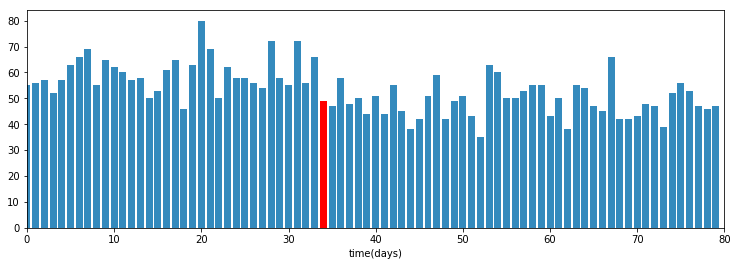

In [43]:
# 1. ユーザーの揺るまいが変化する変化点をDiscreteUniformからサンプリングする
tau = pm.rdiscrete_uniform(0, 80)

#2 指数分布をλ1, λ2からサンプリングする。
alpha= 1.0/20
lambda_1, lambda_2 = pm.rexponential(alpha, 2)

#3 日付tauで振り分け
lambda_ = np.r_[lambda_1 * np.ones(tau), lambda_2 * np.ones(80 - tau)]

#4 Poiでサンプリング
data = pm.rpoisson(lambda_)

#5 plot
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau-1, data[tau-1], color ='r')
plt.xlabel("time(days)")
plt.xlim([0,80])